In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
df = pd.read_csv('FY2020.csv')

In [225]:
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [33]:
len(df[['Company Name']].drop_duplicates())

439

In [38]:
len(df.loc[df['City'] == 'Queens'])

67

In [126]:
len(df['company email'].str.split('@').str[1].dropna().drop_duplicates())

356

In [292]:
comps_per_nta = df.value_counts(subset=['NTA']).reset_index(name='counts')
df2 = comps_per_nta.loc[comps_per_nta['counts']>=5].drop(['counts'], axis=1)
ntas = list(comps_per_nta.loc[comps_per_nta['counts']>=5]['NTA'])

In [299]:
df2['Average Total Savings'] = df2.apply(lambda x: df.loc[df['NTA'] == x["NTA"]]['Total Savings'].mean(), axis=1)
df2['Average Job created'] = df2.apply(lambda x: df.loc[df['NTA'] == x["NTA"]]['Job created'].mean(), axis=1)
df2

,NTA,Average Total Savings,Average Job created
0,Hunters Point-Sunnyside-West Maspeth,23931.398933,NaN
1,Sunset Park West,14316.976875,NaN
2,Queensbridge-Ravenswood-Long Island City,61830.770625,NaN
3,park-cemetery-etc-Brooklyn,14327.419333,NaN
4,Mott Haven-Port Morris,17843.937857,3.333333
5,Greenpoint,9753.649286,NaN
6,Hunts Point,39246.016154,12.000000
7,Carroll Gardens-Columbia Street-Red Hook,24337.390000,NaN
8,East Williamsburg,13990.626364,NaN
9,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,NaN


In [300]:
df2.to_csv('ntas.csv')

In [304]:
list(df2['Average Total Savings'])

[23931.398933333337,
 14316.976875000002,
 61830.770625,
 14327.419333333331,
 17843.937857142857,
 9753.649285714284,
 39246.016153846154,
 24337.390000000003,
 13990.626363636366,
 59950.340000000004,
 26140.455000000005,
 2760.8888888888887,
 6658.283333333334,
 469890.79666666663,
 48433.09333333333,
 4036.298888888889,
 17159.372857142855,
 11227.155714285715,
 17757.662,
 37214.024]

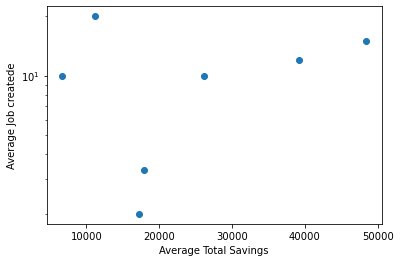

In [359]:
plt.xlabel("Average Total Savings")
plt.ylabel("Average Job createde")
plt.scatter(df2['Average Total Savings'], df2['Average Job created'])
plt.yscale("log")
plt.show()

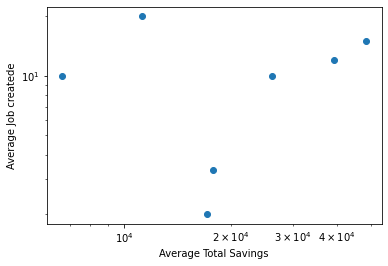

In [347]:
plt.xscale("log")
plt.xlabel("Average Total Savings")
plt.ylabel("Average Job createde")
plt.scatter(df2['Average Total Savings'], df2['Average Job created'])
plt.yscale("log")
plt.show()

(array([2., 1., 2., 6., 3., 4., 1., 0., 0., 1.]),
 array([ 7.92330797,  8.43700273,  8.95069749,  9.46439226,  9.97808702,
        10.49178178, 11.00547655, 11.51917131, 12.03286607, 12.54656084,
        13.0602556 ]),
 <BarContainer object of 10 artists>)

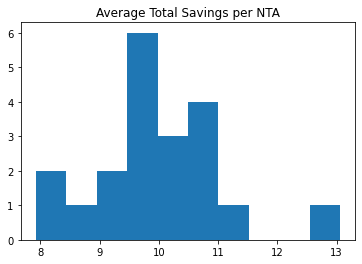

In [354]:
plt.title("Average Total Savings per ")
plt.hist(np.log(df2['Average Total Savings']))